Panama Climate 
Sarah Lawson Woods
October 2021

Goal: 
This mini-project has the objective to predict temperatures for the date 2013-09-01 for the country of Panama using time series analysis and have the results delivered within 36 hours.

Planning:

Executive Summary:

In [1]:
# Imports

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# for modeling
from statsmodels.tsa.api import Holt

import mini_proj_functions as m

# Acquire

In [2]:
df = m.get_temp_data()

In [3]:
df.head(25)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


# Prepare

In [4]:
#first I need to narrow down to data only concerning Panama
df = df.loc[df['Country'] == 'Panama']

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5666133,1825-01-01,27.353,1.886,Panamá,Panama,8.84N,80.27W
5666134,1825-02-01,27.392,1.588,Panamá,Panama,8.84N,80.27W
5666135,1825-03-01,27.971,1.862,Panamá,Panama,8.84N,80.27W
5666136,1825-04-01,28.671,2.005,Panamá,Panama,8.84N,80.27W
5666137,1825-05-01,27.077,1.271,Panamá,Panama,8.84N,80.27W


In [6]:
df.shape

(4530, 7)

In [7]:
df.info

<bound method DataFrame.info of                  dt  AverageTemperature  AverageTemperatureUncertainty  \
5666133  1825-01-01              27.353                          1.886   
5666134  1825-02-01              27.392                          1.588   
5666135  1825-03-01              27.971                          1.862   
5666136  1825-04-01              28.671                          2.005   
5666137  1825-05-01              27.077                          1.271   
...             ...                 ...                            ...   
6666426  2013-05-01              27.743                          0.216   
6666427  2013-06-01              27.303                          0.406   
6666428  2013-07-01              27.370                          0.505   
6666429  2013-08-01              27.124                          0.821   
6666430  2013-09-01                 NaN                            NaN   

                  City Country Latitude Longitude  
5666133         Panamá  Pan

In [8]:
# change the df to a datetimeindex
df['dt'] = pd.to_datetime(df.dt)

In [9]:
# reset the index to the dt
df = df.set_index('dt')

In [10]:
# narrow down time frame
df = df.loc['1800':'2010']

In [11]:
# check out df to see changes
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1825-01-01,27.353,1.886,Panamá,Panama,8.84N,80.27W
1825-02-01,27.392,1.588,Panamá,Panama,8.84N,80.27W
1825-03-01,27.971,1.862,Panamá,Panama,8.84N,80.27W
1825-04-01,28.671,2.005,Panamá,Panama,8.84N,80.27W
1825-05-01,27.077,1.271,Panamá,Panama,8.84N,80.27W


In [12]:
df.shape

(4464, 6)

In [13]:
df.isna().sum()

AverageTemperature               516
AverageTemperatureUncertainty    516
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

In [14]:
# using interpolation a common time series technique used to fill nulls with help from neighbors of missing values
df = df.interpolate(method='linear')   

In [15]:
df.isna().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [16]:
#c now I need to create a column that has temps in fahrenheit
df['Average_Temp_F'] = (df['AverageTemperature'] * 9/5) + 32

In [17]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Average_Temp_F
dt,,,,,,,
1825-01-01,27.353,1.886,Panamá,Panama,8.84N,80.27W,81.2354
1825-02-01,27.392,1.588,Panamá,Panama,8.84N,80.27W,81.3056
1825-03-01,27.971,1.862,Panamá,Panama,8.84N,80.27W,82.3478
1825-04-01,28.671,2.005,Panamá,Panama,8.84N,80.27W,83.6078
1825-05-01,27.077,1.271,Panamá,Panama,8.84N,80.27W,80.7386


In [18]:
# looking for errors in data temps
df.Average_Temp_F.min(), df.Average_Temp_F.max()

(75.65180000000001, 86.4032)

In [19]:
df.head(40)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Average_Temp_F
dt,,,,,,,
1825-01-01,27.3530,1.8860,Panamá,Panama,8.84N,80.27W,81.2354
1825-02-01,27.3920,1.5880,Panamá,Panama,8.84N,80.27W,81.3056
1825-03-01,27.9710,1.8620,Panamá,Panama,8.84N,80.27W,82.3478
1825-04-01,28.6710,2.0050,Panamá,Panama,8.84N,80.27W,83.6078
1825-05-01,27.0770,1.2710,Panamá,Panama,8.84N,80.27W,80.7386
1825-06-01,26.9850,1.1350,Panamá,Panama,8.84N,80.27W,80.5730
1825-07-01,26.1860,1.9790,Panamá,Panama,8.84N,80.27W,79.1348
1825-08-01,25.7140,1.9540,Panamá,Panama,8.84N,80.27W,78.2852
1825-09-01,25.1260,1.5860,Panamá,Panama,8.84N,80.27W,77.2268


In [20]:
# def prep_data(df):
#     #first I need to narrow down to data only concerning Panama
#     df = df.loc[df['Country'] == 'Panama']
#     return df  

In [21]:
# dropping unnecessary columns
df = df.drop(columns=['AverageTemperature', 'City', 'Longitude', 'Latitude', 'AverageTemperatureUncertainty','Country'])

# Train, test, split

In [22]:
# so here I got estimates of what the length of train, validate, test should be and then looked at where those
# rows ended and added the last few months of that year into each new df

In [23]:
# total rows 4464
# take near 70% for train
4464 * .7

3124.7999999999997

In [24]:
# take near 25% of train for validate
3124 * .25

781.0

In [25]:
# take near 30% for test
4464 * .3

1339.2

In [26]:
# this tells me the year my train will end so I can include each month
df.iloc[3124]

Average_Temp_F    80.1554
Name: 1899-05-01 00:00:00, dtype: float64

In [27]:
#train is equal to the beginning entry in 1800 through 1890, so adding the other 8 months to 3124
train = df.iloc[0:3132]

In [75]:
df.iloc[3132], df.iloc[0]

(Average_Temp_F    78.692
 Name: 1900-01-01 00:00:00, dtype: float64,
 Average_Temp_F    81.2354
 Name: 1825-01-01 00:00:00, dtype: float64)

In [28]:
validate = df.iloc[3133:3923]

In [73]:
df.iloc[3133], df.iloc[3923]

(Average_Temp_F    81.8906
 Name: 1900-02-01 00:00:00, dtype: float64,
 Average_Temp_F    80.5712
 Name: 1965-12-01 00:00:00, dtype: float64)

In [29]:
test = df.iloc[3924:]

In [30]:
train.shape

(3132, 1)

In [31]:
validate.shape

(790, 1)

In [32]:
test.shape

(540, 1)

# Explore

In [33]:
# lets store our target in a variable named y for ease of access
y = train.Average_Temp_F

In [34]:
# looks good
y.head()

dt
1825-01-01    81.2354
1825-02-01    81.3056
1825-03-01    82.3478
1825-04-01    83.6078
1825-05-01    80.7386
Name: Average_Temp_F, dtype: float64

In [35]:
# make a histogram of the target variable

<AxesSubplot:ylabel='Frequency'>

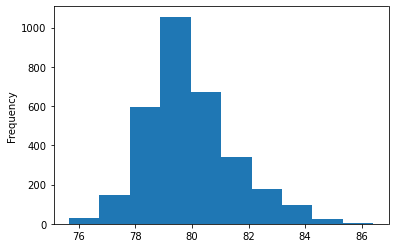

In [36]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

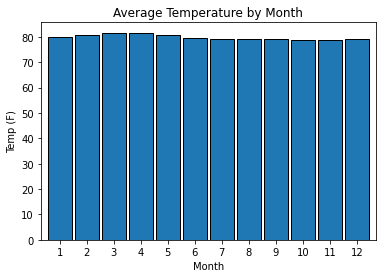

In [37]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

In [38]:
train.shape

(3132, 1)

<AxesSubplot:xlabel='dt'>

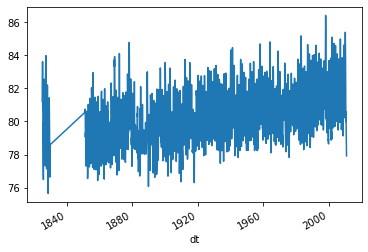

In [39]:
# visualize the target over time yearly
y.plot()

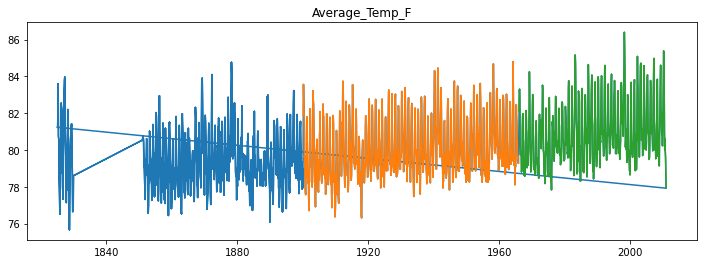

In [40]:
def plot_samples(target_var):
    ''' this function will plot the train, validate and test values for a single variable 
    '''
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var])
    plt.plot(validate[target_var])
    plt.plot(test[target_var])
    plt.title(target_var)
    plt.show()
    
    # plot the data points, color by train, validate, test
#col = 'dollars_sold'
for col in train.columns:
    plot_samples(col)

plt.show()

In [41]:
train.shape

(3132, 1)

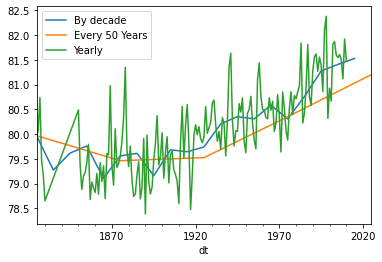

In [42]:
# now we can see the trend of temps by year, decade and every 50 years
y.resample('10Y').mean().plot(label ='By decade')
y.resample('50Y').mean().plot(label= 'Every 50 Years')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

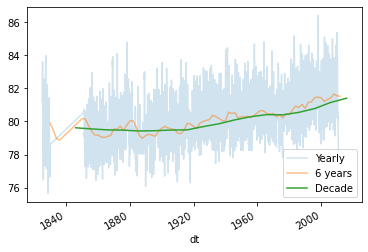

In [43]:
# let's look at the rolling trend
y.plot(alpha=.2, label='Yearly')
y.resample('2Y').mean().rolling(3).mean().plot(alpha=.5, label='6 years')
y.resample('10Y').mean().rolling(3).mean().plot(alpha=8, label='Decade')
plt.legend()

In [44]:
train.shape

(3132, 1)

<AxesSubplot:title={'center':'Average decade change in temperature'}, xlabel='dt'>

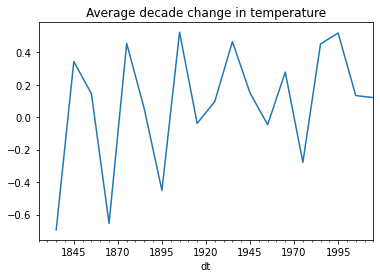

In [45]:
# visualize change over time
y.resample('10Y').mean().diff().plot(title='Average decade change in temperature')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='dt'>

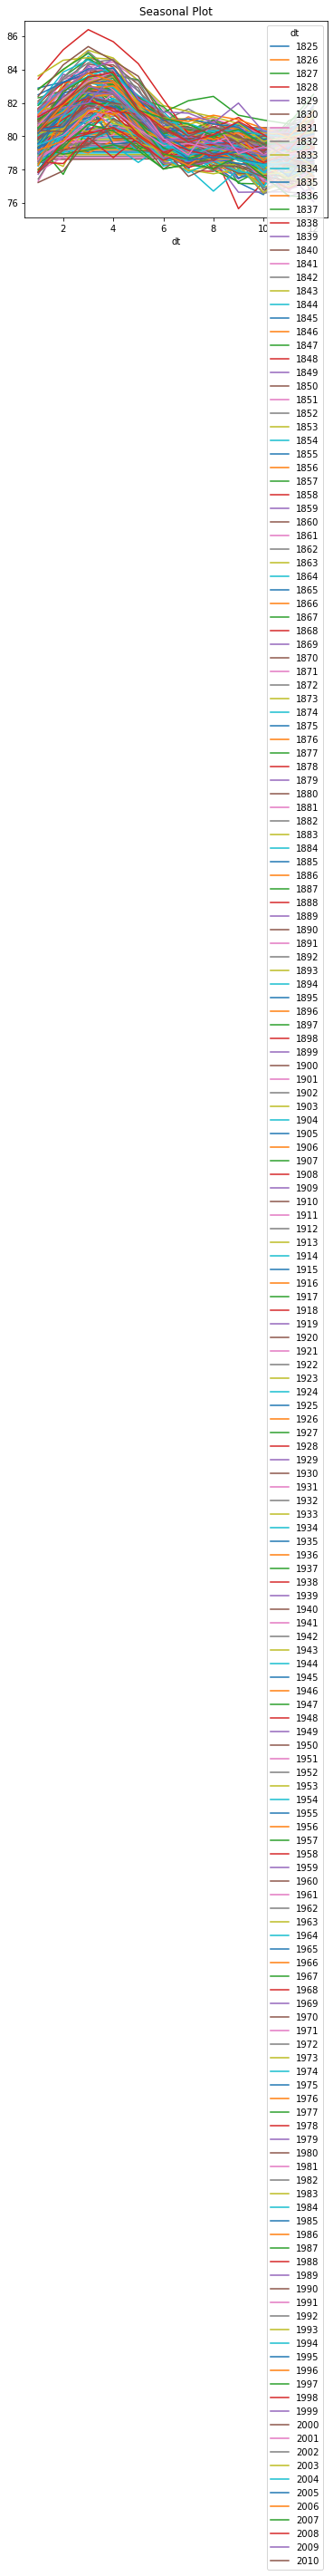

In [46]:
# create a seasonal plot
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

Text(0.5, 1.0, 'Lag plot with lag=1')

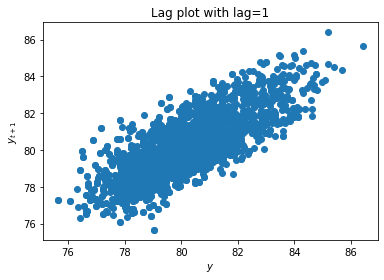

In [47]:
# lag plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

In [48]:
train.shape

(3132, 1)

In [49]:
# use seasonal_decompose function from the statsmodels library to perform decomposition
y = train.Average_Temp_F.resample('10Y').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
dt,,,,
1825-12-31,79.968650,79.968650,0.0,0.0
1835-12-31,79.273933,79.273933,0.0,0.0
1845-12-31,79.616417,79.616417,0.0,0.0
1855-12-31,79.760324,79.760324,0.0,0.0
1865-12-31,79.105580,79.105580,0.0,0.0


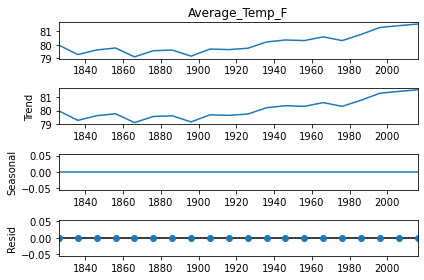

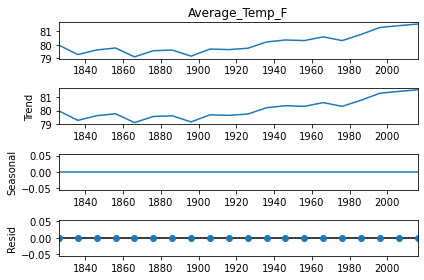

In [50]:
# the value returned from seasonal_decompose plotted
result.plot()

<AxesSubplot:xlabel='dt'>

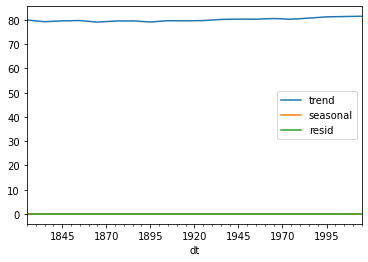

In [51]:
decomposition.iloc[:, 1:].plot()

In [52]:
# test = test.resample('10Y').mean()
# validate = validate.resample('10Y').mean()
# train = train.resample('10Y').mean()
# # create a categorical feature
# train['temp_bin'] = pd.qcut(train.Average_Temp_F, 3, labels=['cool', 'warm', 'hot'])
# train.groupby('temp_bin').mean()

In [53]:
train.shape

(3132, 1)

In [54]:
# (train.groupby('temp_bin')
#  .resample('5Y')
#  .size()
#  .unstack(0)
#  .apply(lambda row: row / row.sum(), axis=1)
#  .plot.area()
# )
# plt.ylabel('% of days in the month')

Takeaways
-the target variable temperature is normally distributed
-there is no much change in temperature by month at all
-average temperature yearly is slowly increasing
-when you look at temperature by decade its slope is less
-when you look at temperture by every 50 years the slope is less than by decade or by year
-from March to Dec the average temp is slowly dropping
-the lag plot shows a pretty strong linear correlation in temp from one year to the next

# Forecast

In [55]:
# define evaluation function to compute rmse

def evaluate(target_var):
    '''
    the evaluate function will take in the actual values in the validate and the predicted values
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [56]:
# plot and evaluate: plot
def plot_and_eval(target_var):
    '''
    a function to evaluate forecasts by computing the rmse and plot train and validate along with predictions
    '''
    plot_samples(target_var)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '--RMSE:  {: 0f}'.format(rmse))
    plt.show()

In [57]:
# Create the empty dataframe with model_type, target_var, rmse
eval_df = pd.DataFrame(columns = ['model_type', 'target_var','rmse'])

In [58]:
# check out the data frame
eval_df

,model_type,target_var,rmse


In [59]:
# Define function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    '''
    this function is going to take in the model_type as a string, the target variable as a string,
    and run the evaluate() function to compute the rmse,
    and append to the dataframe a row with the model_type, target_var, and rmse. 
    It will return the new dataframe.
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Last observed value

In [60]:
# create var 'items' with last observed value
temps = train['Average_Temp_F'][-1]
temps

77.9306

In [61]:
# make predictions by adding those values to new dataframe yhat_df
yhat_df = pd.DataFrame({'Average_Temp_F': [temps]}, index = validate.index)
yhat_df.head(2)

,Average_Temp_F
dt,
1900-02-01,77.9306
1900-03-01,77.9306


In [62]:
train.head()

,Average_Temp_F
dt,
1825-01-01,81.2354
1825-02-01,81.3056
1825-03-01,82.3478
1825-04-01,83.6078
1825-05-01,80.7386


### Evaluate

Evaluate using RMSE, and add evaluation metrics to eval_df

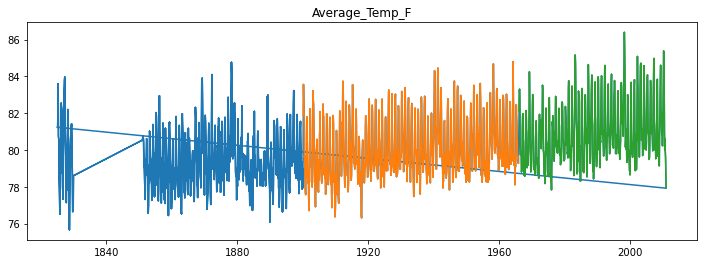

Average_Temp_F --RMSE:   3.000000


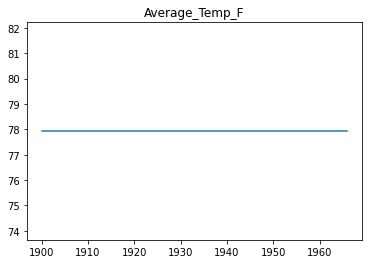

In [63]:
plot_and_eval('Average_Temp_F')

In [64]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', target_var = col)

### Simple Average

In [65]:
Average_Temp_F = train['Average_Temp_F'].mean()

In [66]:
def make_predictions(anything):
    yhat_df = pd.DataFrame({'Average_Temp_F': [Average_Temp_F]}, index = validate.index)
    return yhat_df

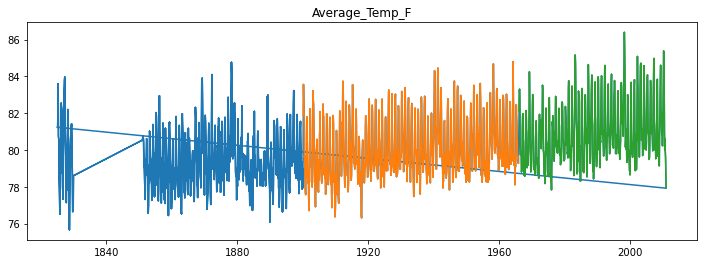

In [67]:
plot_samples('Average_Temp_F')

Plot actual v. predicted

In [69]:
yhat_df = make_predictions(Average_Temp_F)
yhat_df

,Average_Temp_F
dt,
1900-02-01,79.887905
1900-03-01,79.887905
1900-04-01,79.887905
1900-05-01,79.887905
1900-06-01,79.887905
...,...
1965-07-01,79.887905
1965-08-01,79.887905
1965-09-01,79.887905


### Predict Based on Previous Cycle

Compute the 12 month average year over year differences from 1800 through 2010
Add that average delta to the values during 2010.
Set the index in your yhat dataframe to represent the dates those predictions are made for.

In [79]:
train = df.loc['1825':'1900']
validate = df.loc['1901':'1965']
test = df.loc['1966':'2010']

In [95]:
validate.shape

(1560, 1)

In [91]:
# decade difference
train.diff(120).mean()

Average_Temp_F    0.012457
dtype: float64

Make Predictions

In [102]:
# take the values for each decade between 1825 and 1900 and add the average decade over decade(yoy)(y/y)
yhat_df = train.loc['1836':'1900'] + train.diff(120).mean()

In [103]:
# set yhat_df to index of validate
yhat_df = yhat_df.set_index(validate.index)

In [109]:
train.nunique()

Average_Temp_F    852
dtype: int64

In [110]:
#yhat_df_test = validate.loc['1921':'1965'] + train.diff(120).mean()

In [111]:
eval_df.sort_values('rmse').groupby('target_var').first()

,model_type,rmse
target_var,,
Average_Temp_F,last_observed_value,3.0


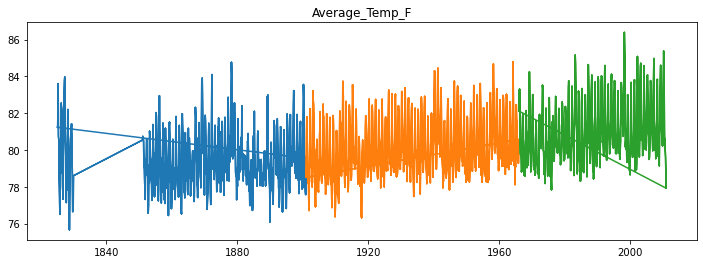

Average_Temp_F --RMSE:   2.000000


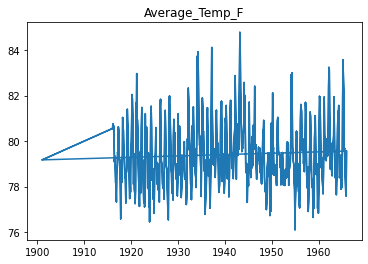

In [112]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'yoy-diff', target_var = col)
    plot_and_eval(target_var = col)

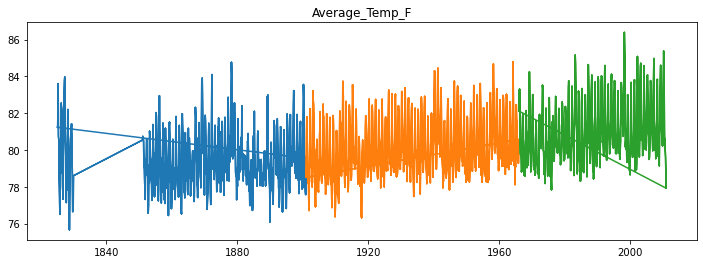

Average_Temp_F --RMSE:   2.000000


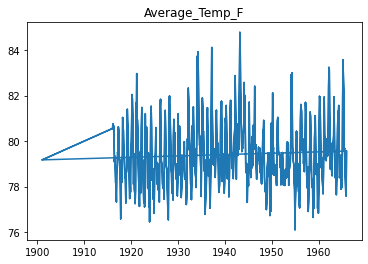

In [117]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'yoy-diff', target_var = col)
    plot_and_eval(target_var = col)

In [118]:
eval_df.sort_values('rmse').groupby('target_var').first()

,model_type,rmse
target_var,,
Average_Temp_F,yoy-diff,2.0


In [120]:
compare_df = pd.concat([yhat_df.Average_Temp_F, validate.Average_Temp_F], axis = 1)
compare_df.columns = ['yhat_Average_Temp_F', 'actual_Average_Temp_F']
compare_df['error'] = compare_df.actual_Average_Temp_F - compare_df.yhat_Average_Temp_F
compare_df['squared_error'] = compare_df.error * compare_df.error
#compare_df[compare_df.squared_error.mean()]
compare_df

,yhat_Average_Temp_F,actual_Average_Temp_F,error,squared_error
dt,,,,
1901-01-01,79.172535,78.5138,-0.658735,0.433932
1901-02-01,79.180205,80.7926,1.612395,2.599818
1901-03-01,79.187874,81.8078,2.619926,6.864010
1901-04-01,79.195544,80.5586,1.363056,1.857922
1901-05-01,79.203214,80.3930,1.189786,1.415592
...,...,...,...,...
1965-08-01,78.823257,79.5740,0.750743,0.563615
1965-09-01,78.303057,79.6352,1.332143,1.774605
1965-10-01,77.730657,79.2842,1.553543,2.413496


# Conclusion

In [ ]:
# test it out on our out-of-sample data

In [124]:
# must use same parameters we used from train
yhat_df_test = validate.loc['1921':'1965'] + train.diff(120).mean()


# set index to that of test
yhat_df_test.index = test.index

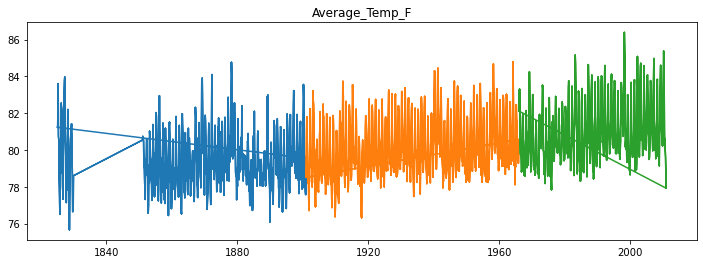

Average_Temp_F --RMSE:   2.000000


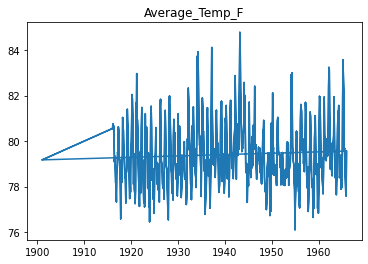

In [126]:
for col in train.columns:
    plot_and_eval(col)
    append_eval_df(model_type = 'dod-diff-test', target_var = col)

So in conclusion the previous cylce model performed best so I will used that on the test data and returned the same RMSE of 2

Need to go back and remove duplicates

Want to go back and remove years I used interpolation to see if this give me better forecasts